In [6]:
import pandas as pd
import numpy as np
#plotting
%matplotlib inline
import matplotlib.pyplot as plt

import plotly.express as px
import plotly.graph_objects as go
import plotly
from plotly.subplots import make_subplots
#plotly.offline.init_notebook_mode(connected=True)


import ipywidgets as widgets
from ipywidgets import interact, interact_manual

#notebook formatting
from IPython.core.display import display, HTML
from IPython.display import IFrame

import warnings
warnings.filterwarnings('ignore')

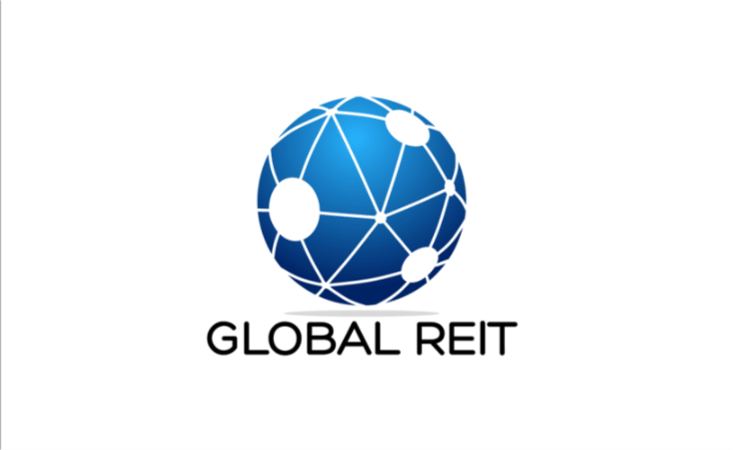

As of 9th July 2021

<a id ="content"></a>
## TABLE OF CONTENTS:

[GICS REIT Classification](#class)

-  [**Global Sector-Wise REIT Returns Box Plot - Interactive**](#1)


-  [**Global Country-Wise REIT Returns Box Plot - Interactive**](#2)


-  [**Global REIT Data Filter Table**](#table)


-  [**High Yielding & High Momentum Specialized REITs**](#specialty)


-  [**High Yielding & High Momentum Industrial REITs**](#industrial)


-  [**High Yielding & High Momentum Retail REITs**](#retail)


-  [**High Yielding & High Momentum Diversified REITs**](#diverse)


-  [**High Yielding & High Momentum Global Healthcare REITs**](#health)


-  [**High Yielding & High Momentum Hotel & Resorts REITs**](#hotel)


-  [**High Yielding & High Momentum Residential REITs**](#residential)


-  [**High Yielding & High Momentum Office REITs**](#office)

In [2]:
data = pd.read_excel('Global_REITS_Data_Latest.xlsx', header=1, sheet_name='All').iloc[:,:18]
data = data[~data['Dvd Type'].isin(['Discontinued', 'Omitted', np.nan])]


def load_reits():
    reits = pd.read_excel('Global_REITS_Data_Latest.xlsx', sheet_name='All', header=1).iloc[:, :18]
    reits = reits[~reits['Dvd Type'].isin(['Discontinued', 'Omitted', np.nan])]
    return reits

reits = load_reits()

In [3]:
a = list(data["Country"].unique()) + ["All"]
#a.append(list(data["Country"]))

<a id ="class"></a>

## GICS REIT Classification Definitions

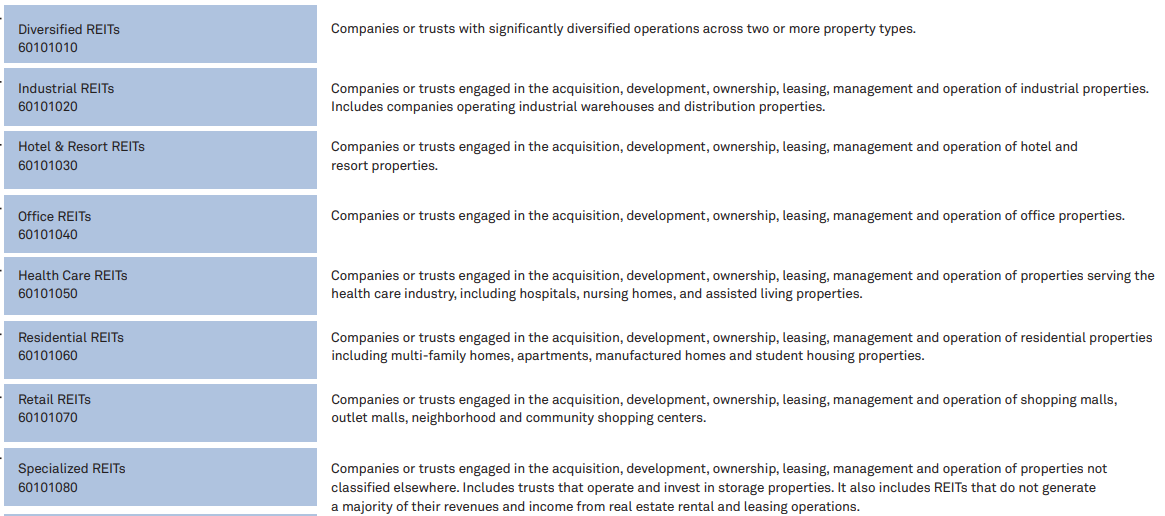

<a id ="1"></a>

[Return to Table of Contents](#content)

## Global Sector-Wise REIT Returns Box Plot

> 1. Select Country or Global

> 2. Select USD Total Return Period from 1M, 3M, 6M, YTD and 1Y or the Dividend Yield (%)

In [4]:
format_dict = {'1W': '{:.2f}%', '1M': '{:.2f}%', '3M': '{:.2f}%', '6M': '{:.2f}%', 'YTD': '{:.2f}%', '1Y': '{:.2f}%', '3Y': '{:.2f}%', 'Dividend Yield': '{:.2f}%', 'MCap ($B)': '${:.2f}B', 'COMPOSITE RANK': '{:.0f}', '%52W High': '{:.2%}'}
def reit_returns(period, country):
    data = reits.copy().round(2)
    if country == "All":
        fig = px.box(data, x="Industry", y=period, color="Industry", 
                     hover_data=["Country", "Ticker", "Name","MCap ($B)",
                                "Dividend Yield", '1W', '1M', '3M', 
                                 '6M', 'YTD', '1Y', '3Y'], points="all")        
    else:
        fig = px.box(data[data["Country"] == country], x="Industry", y=period, color="Industry", 
                     hover_data=["Country", "Ticker", "Name","MCap ($B)",
                                "Dividend Yield", '1W', '1M', '3M', 
                                 '6M', 'YTD', '1Y', '3Y'], points="all")  

    fig.update_layout(title = 'Global REITs Sector Wise USD Returns - '+str(period), 
                      font=dict(family="Segoe UI, monospace", size=13, color="#7f7f7f"),
                      legend_title_text='Industry', plot_bgcolor = 'White')
    fig.update_yaxes(ticksuffix="%")
    fig.add_hline(y=0.0, line_dash="dash", line_color="grey")
    #fig.update_traces(hovertemplate='Date: %{x} <br>Return: %{y:.2%}') 
    return fig.show()
    
style = {'description_width': 'initial'}  
interact(reit_returns, period=widgets.Dropdown(options=['1W', '1M', '3M', 
                                 '6M', 'YTD', '1Y', '3Y', 'Dividend Yield'], value='1M', 
                                               description = 'Period: ', style=style),
                        country = widgets.Dropdown(options=a, value="All", 
                                               description = 'Country: ', style=style));

interactive(children=(Dropdown(description='Period: ', index=1, options=('1W', '1M', '3M', '6M', 'YTD', '1Y', …

In [46]:
def ind_table(country, sortby):
    data1 = data[["Country","Industry", "Dividend Yield", "1W", "1M", "3M", "6M", "YTD", "1Y", "3Y"]]
    if country=="All":
        return data1.groupby(by="Industry").mean().sort_values(by=sortby, ascending=False).style.format(format_dict).background_gradient(cmap="RdYlGn", subset=["1W", "1M", "3M", "6M", "YTD", "1Y", "3Y"])
    else:
        return data1[data1["Country"]==country].groupby(by="Industry").mean().sort_values(by=sortby, ascending=False).style.format(format_dict).background_gradient(cmap="RdYlGn", subset=["1W", "1M", "3M", "6M", "YTD", "1Y", "3Y"])
    
interact(ind_table, sortby=widgets.Dropdown(options=['1W','1M', '3M', 
                                 '6M', 'YTD', '1Y', '3Y', 'Dividend Yield'], value='1M', 
                                               description = 'Period: ', style=style),
                        country = widgets.Dropdown(options=a, value="All", 
                                               description = 'Country: ', style=style));

interactive(children=(Dropdown(description='Country: ', index=23, options=('South Africa', 'Singapore', 'Unite…

[Return to Table of Contents](#content)

<a id ="2"></a>

## Global Country-Wise REIT Returns Box Plot

> Select USD Total Return Period from 1M, 3M, 6M, YTD and 1Y or the Dividend Yield (%)

In [5]:
def reit_cntry(industry, period):
    data = reits.copy().round(2)
    if industry=="All":
        fig = px.box(data, x="Country", y=period, color="Country", 
                     hover_data=["Industry", "Ticker", "Name","MCap ($B)",
                                "Dividend Yield", '1W', '1M','3M',
                                 '6M', 'YTD', '1Y'], points="all")
    else:
        fig = px.box(data[data["Industry"]==industry], x="Country", y=period, color="Country", 
                     hover_data=["Industry", "Ticker", "Name","MCap ($B)",
                                "Dividend Yield", '1W', '1M','3M',
                                 '6M', 'YTD', '1Y'], points="all")       

    fig.update_layout(title = 'Global REITs Country Wise USD Returns - '+str(period), 
                      font=dict(family="Segoe UI, monospace", size=13, color="#7f7f7f"),
                      legend_title_text='Countries', plot_bgcolor = 'White')
    fig.update_yaxes(ticksuffix="%")
    #fig.update_traces(hovertemplate='Date: %{x} <br>Return: %{y:.2%}') 
    fig.update_yaxes(automargin=True, showgrid=True, gridcolor='Grey')
    #fig.update_xaxes(automargin=True, showgrid=True, gridcolor='Grey')
    fig.add_hline(y=0.0, line_dash="dash", line_color="grey")
    return fig
    
style = {'description_width': 'initial'}  
interact(reit_cntry, period=widgets.Dropdown(options=reits.columns[6:13], value='YTD', 
                                               description = 'Period: ', style=style),
                     industry=widgets.Dropdown(options=["All"] + list(reits["Industry"].unique()) , value='All', 
                                               description = 'Industry: ', style=style));

interactive(children=(Dropdown(description='Industry: ', options=('All', 'Retail REITs', 'Industrial REITs', '…

<a id ="table"></a>
## Global REIT Data Filter Table

[Return to Table of Contents](#content)

**NOTE: Composite Rank is calculated as follows:**

1. Rank performance on various timeframes and give weights to the rankings as follows:
   1 Week (5%), 1 Month (20%), 3 Months (25%), 6 Months (10%), 1 Year (10%)
   
   
2. Rank on the basis of Dividend Yields and give 30% weight to the same


3. Calculate weighted average rank which is interpreted as lower is better.

Thus, this measure gives 70% weight to momentum and 30% weight to dividend yield. The weights mentioned here can be changed by the user to see new rankings in the excel sheet sent along with this report.

All REITs used here have paid their last dividend.

In [68]:
def reit_table(country, industry, sortby):
    data = reits.copy().round(2)
    if sortby=='COMPOSITE RANK':
        order=True
    else:
        order=False
        
    if country == 'Global':
        if industry == "All":
            return data.set_index("Ticker").sort_values(by=sortby, ascending=order).style.format(format_dict)
        else:
            return data[data["Industry"]==industry].set_index("Ticker").sort_values(by=sortby, ascending=order).style.format(format_dict)
    else:
        if industry == "All":
            return data[data["Country"]==country].set_index("Ticker").sort_values(by=sortby, ascending=order).style.format(format_dict)
        else:
            return data[data["Country"]==country][data["Industry"]==industry].set_index("Ticker").sort_values(by=sortby, ascending=order).style.format(format_dict)
        
interact(reit_table, sortby=widgets.Dropdown(options=["COMPOSITE RANK", "Dividend Yield", '1W', '1M','3M',
                                 '6M', 'YTD', '1Y', '3Y'], value='COMPOSITE RANK', 
                                               description = 'Sort By: ', style=style),
                        country = widgets.Dropdown(options= a[:-1] + ["Global"], value="Global", 
                                               description = 'Country: ', style=style),
                        industry = widgets.Dropdown(options= list(data['Industry'].unique()) + ["All"], value="All", 
                                               description = 'Industry: ', style=style));

interactive(children=(Dropdown(description='Country: ', index=23, options=('South Africa', 'Singapore', 'Unite…

<a id ="office"></a>

[Return to Table of Contents](#content)

## High Yielding & High Momentum Office REITs

In [70]:
div = data.set_index("Ticker").T[["COF AU Equity", "SOT-U CN Equity","3476 JP Equity", "TNT-U CN Equity"]].T.sort_values(by="COMPOSITE RANK", ascending=True)
div.iloc[:,:12].drop(['COMPOSITE RANK'],axis=1).style.format(format_dict).background_gradient(cmap="RdYlGn").set_caption('GLOBAL TOP OFFICE REITs')

<a id ="retail"></a>

[Return to Table of Contents](#content)

## High Yielding & High Momentum Retail REITs

In [84]:
div = data.set_index("Ticker").T[[
 'NTST US Equity',
 'SGR-U CN Equity',
 'REI-U CN Equity',
 '778 HK Equity',
 'HDN AU Equity',
 'SRU-U CN Equity','CRR-U CN Equity',
 'SASSR SP Equity',
'HMC AU Equity']].T.sort_values(by="COMPOSITE RANK", ascending=True)
div.iloc[:,:12].drop(['COMPOSITE RANK'],axis=1).style.format(format_dict).background_gradient(cmap="RdYlGn").set_caption('Global Top Residential REITs')

> [**SLATE GROCERY REIT - CANADA**](https://www.slategroceryreit.com/sites/default/files/retail_block_report/sgr_q1_2021_investor_update_vf.pdf):  Slate Grocery REIT is a leading investor in U.S. grocery-anchored real estate, generating growth for unitholders by acquiring well-positioned properties and bringing value-added skills to bear. High quality tenant base, outstanding dividend of 8.3%.


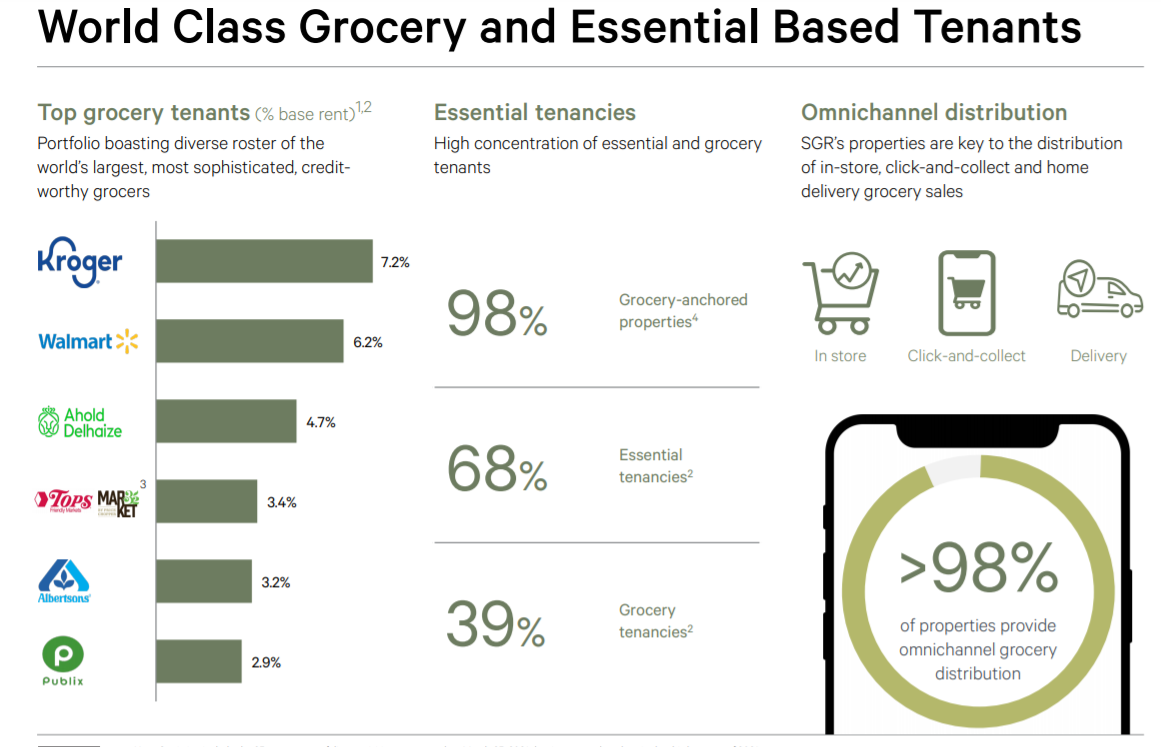

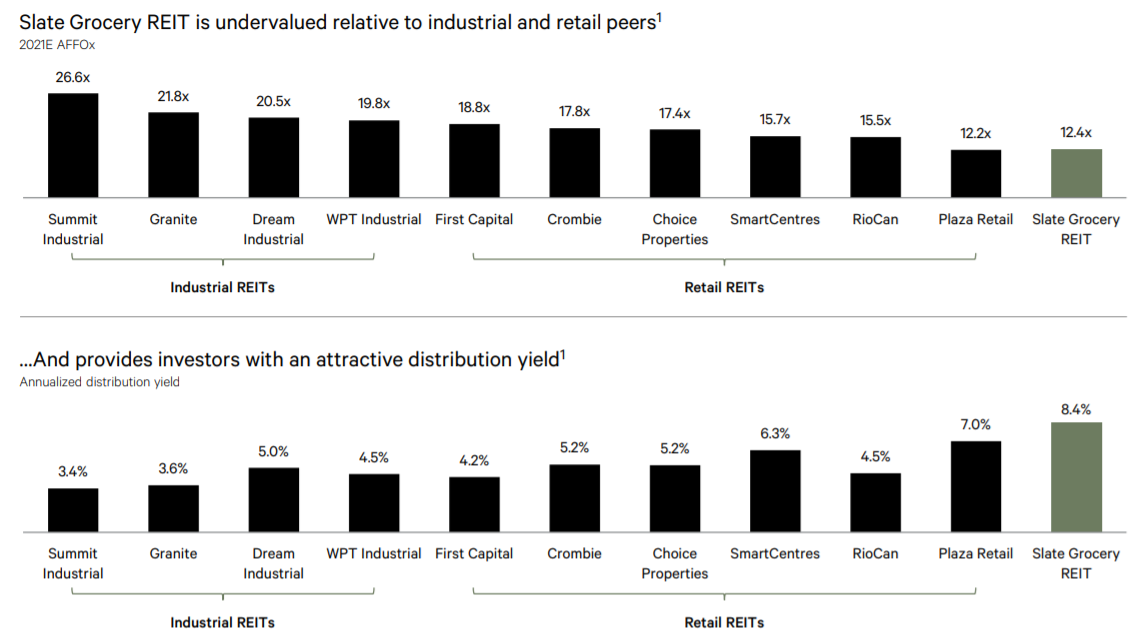

> [**SASSEUR REIT - SINGAPORE**](https://investor.sasseurreit.com/newsroom/20210708_073523_CRPU_7F2D204R62BJVAI9.1.pdf): Listed on the Mainboard of the Singapore Exchange, Sasseur REIT offers investors the unique opportunity to invest in the fast-growing retail outlet mall sector in the People’s Republic of China (“PRC”). As the leading privately-owned outlet mall operator in the PRC, the Sponsor currently manages and operates eleven outlet malls. The initial portfolio comprises four retail outlet malls strategically located in fast-growing cities in the PRC – Chongqing, Bishan, Hefei and Kunming. Wong and Tan from the DBS group stated that they raised their **“growth estimates for Sasseur REIT as one of the best placed REITs to ride on the China luxury market boom”.** Strong credit metrics with interest coverage ratio of 7.5 times. Great **dividend yield of 7.2%**.

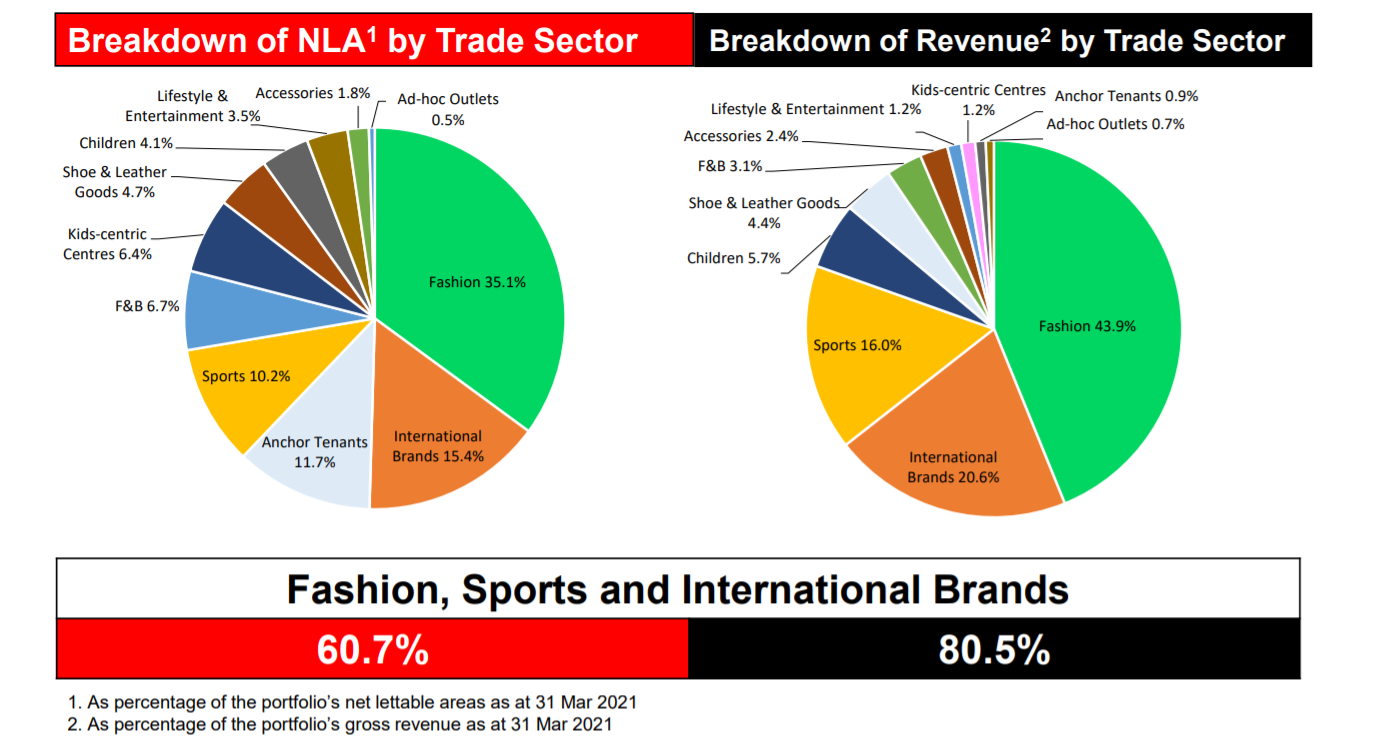

<a id ="residential"></a>

[Return to Table of Contents](#content)

## High Yielding & High Momentum Residential REITs

In [90]:
div = data.set_index("Ticker").T[[
 'IRT US Equity',
 'CPT US Equity',
 'MAA US Equity',
 'AIRC US Equity',
 'CSR US Equity',
 'AVB US Equity',
 '8979 JP Equity',
 'INVH US Equity',
 'ACC US Equity',
 'AMH US Equity',
 'UMH US Equity',
 'ELS US Equity',
 '3278 JP Equity']].T.sort_values(by="1Y", ascending=False)
div.iloc[:,:12].drop(['COMPOSITE RANK'],axis=1).style.format(format_dict).background_gradient(cmap="RdYlGn").set_caption('Global Top Residential REITs')

<a id ="hotel"></a>

[Return to Table of Contents](#content)

## High Yielding & High Momentum Hotel & Resort REITs

In [98]:
div = data.set_index("Ticker").T[['MGP US Equity',
 '3287 JP Equity',
 '3478 JP Equity']].T.sort_values(by="COMPOSITE RANK", ascending=True)
div.iloc[:,:12].drop(['COMPOSITE RANK'],axis=1).style.format(format_dict).background_gradient(cmap="RdYlGn").set_caption('Global Top Hotel & Resort REITs')

> [**MGM GROWTH PROPERTIES  - US**](https://s2.q4cdn.com/688077634/files/doc_presentations/2021/06/MGP-Investor-Presentation-6.7.2021.pdf): MGM Growth Properties LLC is a real estate investment trust engaged in the acquisition, ownership and leasing of destination entertainment and leisure resorts, whose amenities include casino gaming, hotel, convention, dining, entertainment and retail offerings. Its portfolio consists of approximately 11 destination resorts. It operates approximately 27,500 hotel rooms, over 200 restaurants, approximately 100 retail outlets and over 20 entertainment venues. **Collected 100% of Rent in 2020 despite economic headwinds from the pandemic.**

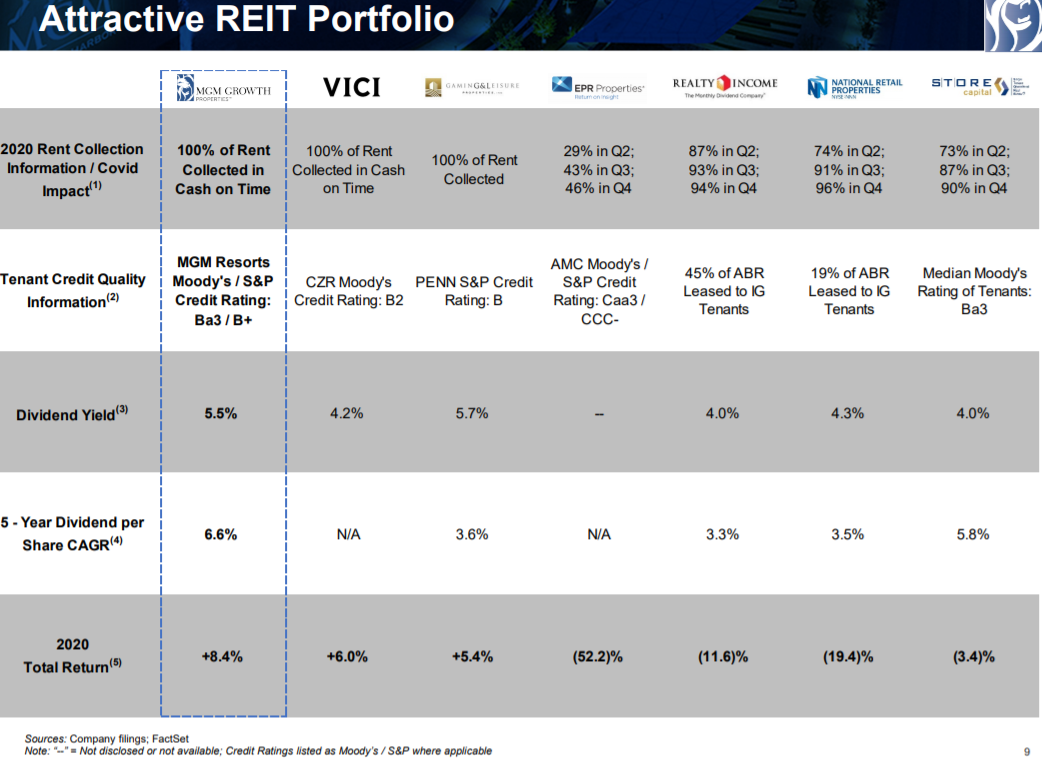

<a id ="diverse"></a>

[Return to Table of Contents](#content)

## High Yielding & High Momentum Diversified Global REITs

In [103]:
div = data.set_index("Ticker").T[['OLP US Equity',
 'ALAHLI AB Equity',
 'BNL US Equity',
 '3468 JP Equity',
 'DERAYAHR AB Equity',
 'CTO US Equity',
 '3492 JP Equity',
 'HR-U CN Equity',
 'SPG NZ Equity',
 'GOOD US Equity',
 'ARG NZ Equity',
 'PINE US Equity']].T.sort_values(by="Country", ascending=True)
div.iloc[:,:12].drop(['COMPOSITE RANK'],axis=1).style.format(format_dict).background_gradient(cmap="RdYlGn").set_caption('Global Top Diversified REITs')

> [**H&R REAL-REIT  - CANADA**](https://www.hr-reit.com/wp-content/uploads/2021/05/Q1-2021-Investor-Presentation-Final-1.pdf):  Its segments include Office, Retail, Industrial and Residential. The Trust owns, operates and develops commercial and residential properties across Canada and in the United States. H&R achieved an overall rent collection of 94% in April 2021, compared to 96% in Q1 2021 and 96% in Q4 2020.


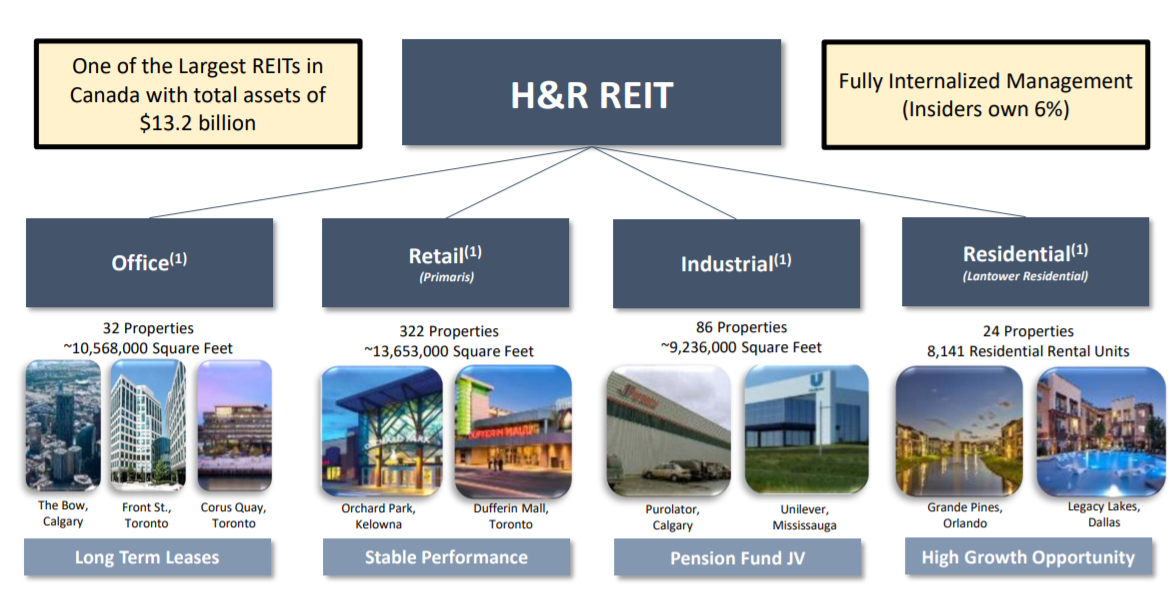

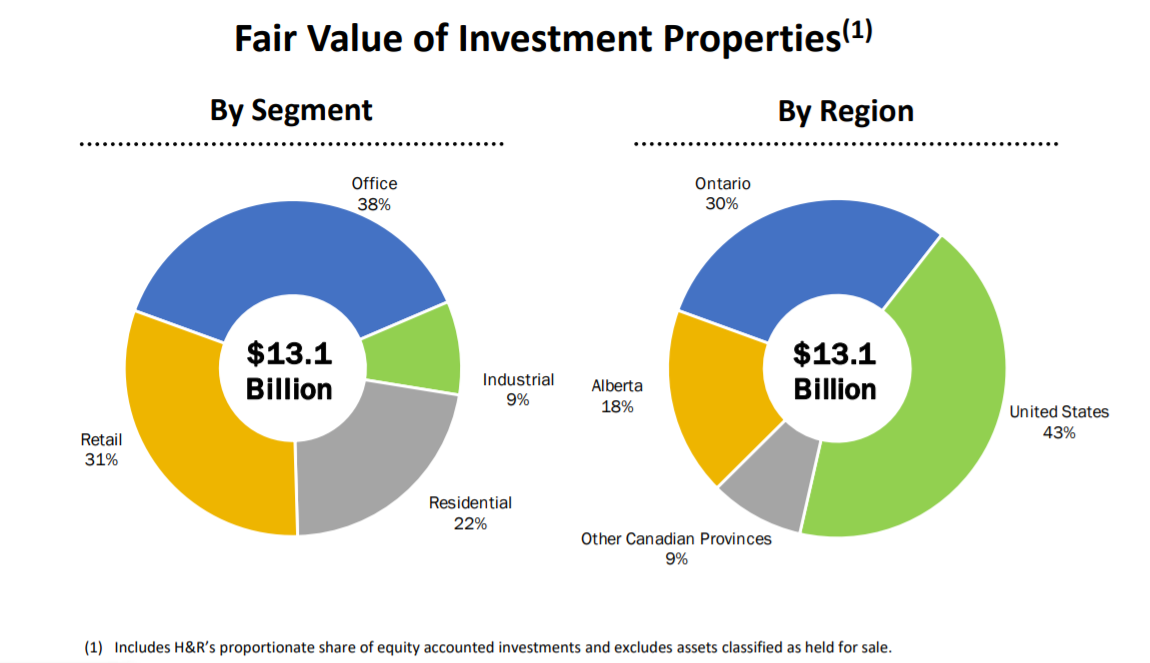

> [**ONE LIBERTY PROPERTIES - US**](https://1liberty.com/filesystem/one-liberty-properties/Investor%20Relations/INVESTOR%20PRESENTATIONS/2021/Investor_Presentation_-_January_2021_(FINAL).pdf): The Company acquires, owns and manages a geographically diversified portfolio consisting of retail, industrial, flex, and health and fitness properties. The Company owns 125 properties, which are located in 30 states and have an aggregate of approximately 10.6 million square feet (including an aggregate of approximately 1.2 million square feet at properties owned by its joint ventures). Occupancy rate of 96.9%. High dividend yield of 6.32%.


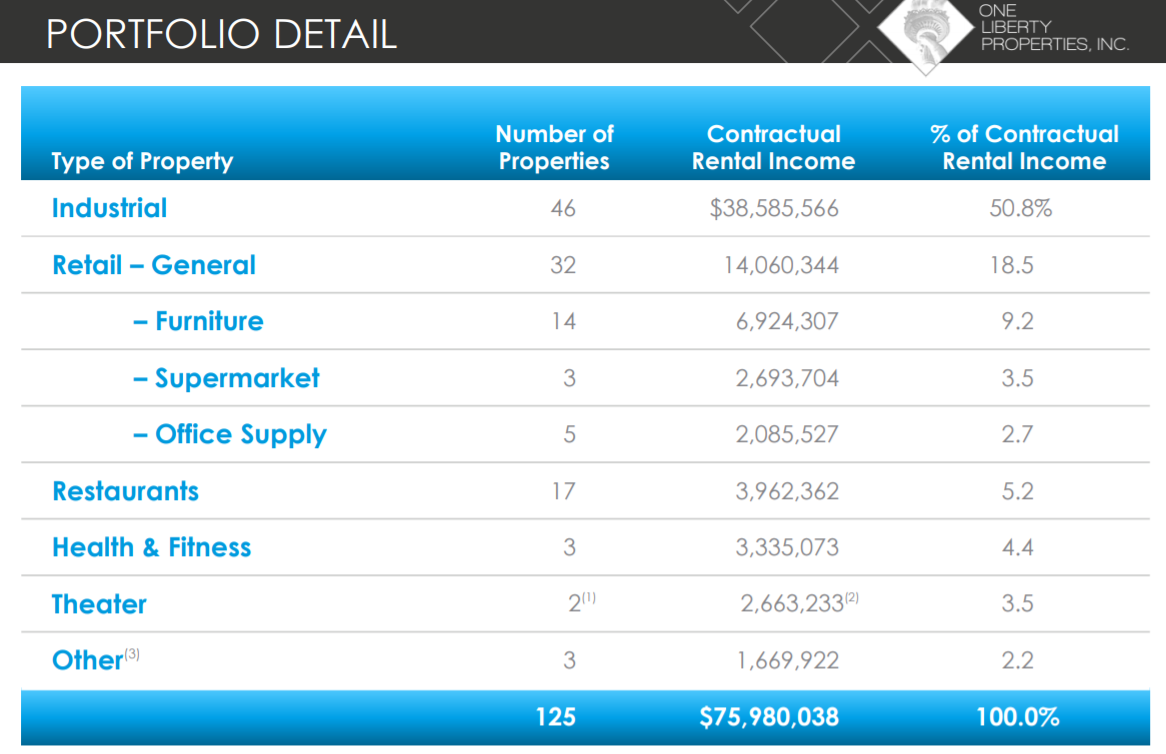

> [**GLADSTONE COMMERCIAL - US**](https://d1io3yog0oux5.cloudfront.net/_3e2dc5619b57aacd4b3ff17a170c407d/gladstonecommercial/db/858/8090/pdf/GOOD+RETIWeek+Presentation+2021.pdf): The Company focuses on acquiring, owning and managing primarily office and industrial properties. The Company also makes long-term industrial and commercial mortgage loans. Its real estate portfolio consists of approximately 122 properties located in 28 states, totaling approximately 14.9 million square feet. The Company's properties have tenants from various industries, such as telecommunications; healthcare; automobile; diversified/conglomerate services; diversified/conglomerate manufacturing; plastics and rubber; containers, and personal and non-durable consumer products. Occupancy rate stands at 95.5% and occupancy has never dipped below 95.0% since the IPO in 2003. Portfolio consists of 48% industrial, 47% office, 3% retail and 2% medical office. 

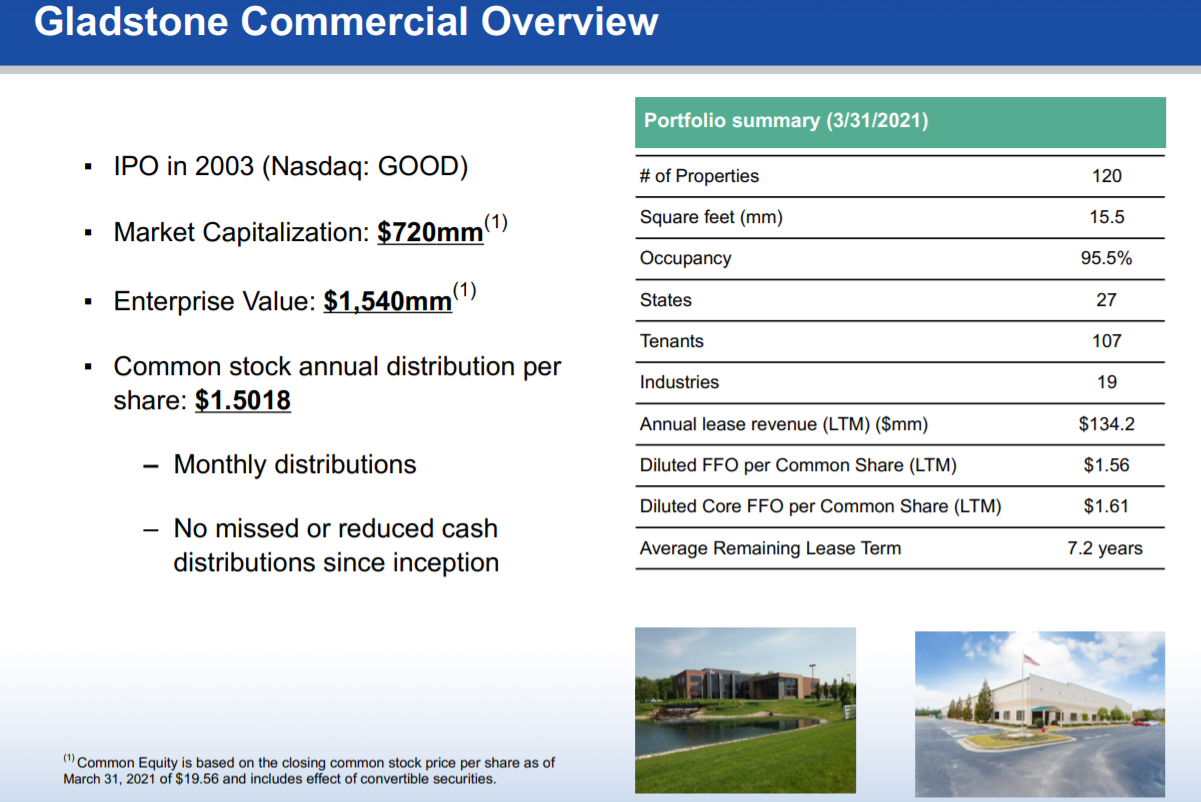

<a id ="health"></a>

[Return to Table of Contents](#content)

## High Yielding & High Momentum Global Healthcare REITs

In [109]:
hlt = data.set_index("Ticker").T[[
 'ARF AU Equity',
 'GMRE US Equity',#
 'WELL US Equity',
 '3455 JP Equity',
 'PREIT SP Equity',
 'AED BB Equity',
 'VHP NZ Equity',
 'PHP LN Equity',
 'NWH-U CN Equity']].T.sort_values(by="COMPOSITE RANK", ascending=True)
hlt.iloc[:,:12].drop(['COMPOSITE RANK'],axis=1).style.format(format_dict).background_gradient(cmap="RdYlGn").set_caption('Global Top Healthcare REITs')

> [**PARKWAYLIFE REIT - SINGAPORE**](https://plifereit.listedcompany.com/newsroom/20210423_071715_C2PU_F25ITZPC60X8IZML.1.pdf): The REIT invests in real estate and real estate-related assets that are used primarily for healthcare and healthcare-related purposes, including hospitals, healthcare facilities, and real estate and real estate assets used for healthcare research, education, and the manufacturing or storage of drugs, medicine, and other healthcare goods and devices. Its operating segments include Hospitals and medical centers, Nursing homes, and Pharmaceutical Manufacturing and Distribution Facility. It owns a portfolio of private hospitals in Singapore comprising Mount Elizabeth Hospital, Gleneagles Hospital and Parkway East Hospital. In addition, it has over 49 assets located in Japan, including one pharmaceutical product distributing and manufacturing facility in Chiba Prefecture as well as over 54 nursing home and care facility properties.

> Interest coverage ratio of 20.9 times. All-in cost of debt of just 0.55%. Rental growth attached to CPI (0% if CPI is negative, leading to downside protection).

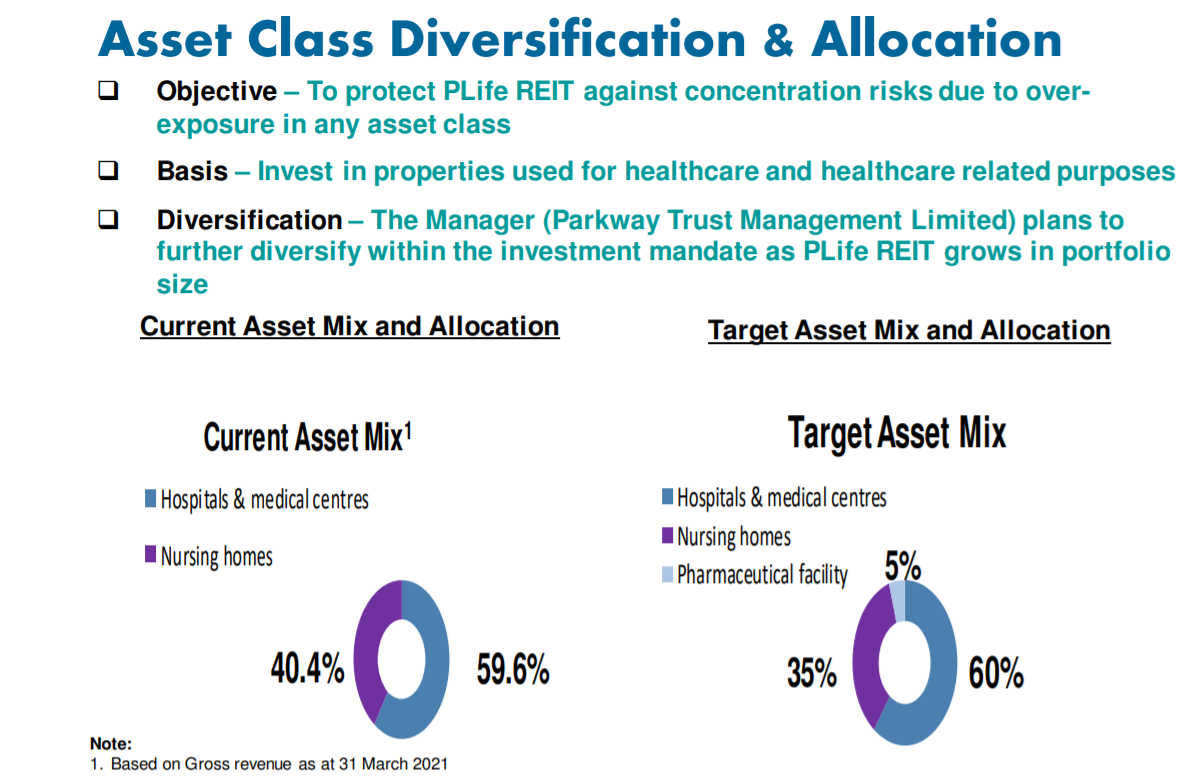

> [**WELLTOWER - US**](): Welltower Inc. invests with seniors housing operators, post-acute providers and health systems to fund real estate and infrastructure. The Company invests in seniors housing and healthcare real estate. It operates in three segments: triple-net, seniors housing operating and outpatient medical. It owns interests in properties concentrated in markets in the United States, Canada and the United Kingdom. Its triple-net properties include independent living facilities, independent supportive living facilities (Canada), continuing care retirement communities, assisted living facilities, care homes with and without nursing (the United Kingdom), Alzheimer's/dementia care facilities, long-term/post-acute care facilities and hospitals. Its outpatient medical properties include outpatient medical buildings.

> It ranked 542nd on the Fortune 1000 in 2020 and is a component of the S&P 500. As of early 2021, the firm had an enterprise value of USD 40 billion and is the world's largest healthcare real estate investment trust.

<a id ="industrial"></a>

[Return to Table of Contents](#content)

## High Yielding & High Momentum Industrial REITs

In [112]:
ids = data.set_index("Ticker").T[['ALLT SP Equity',
 'AAREIT SP Equity',
 'DIR-U CN Equity',
 'SMU-U CN Equity',
 'WIR/U CN Equity',
 'ILPT US Equity',
 'STAG US Equity',
 'WHR LN Equity',
 'ADI AU Equity',
 'SGRO LN Equity',
 '3487 JP Equity',
 'BBOX LN Equity']].T.sort_values(by="COMPOSITE RANK", ascending=True)
ids.iloc[:,:12].drop(['COMPOSITE RANK'],axis=1).style.format(format_dict).background_gradient(cmap="RdYlGn").set_caption('Global Top Industrial REITs')

> [**ARA LOGOS LOGISTICS (ALLT - Singapore)**](https://investor.aralogos-reit.com/newsroom/20210310_080238_K2LU_8XR0C7MHL0BN9Z1G.1.pdf):  The Company invests in real estate used for logistics purposes, as well as real estate-related assets, in Asia-Pacific. Its portfolio comprises of approximately 27 logistics warehouse properties strategically located in logistics clusters in Singapore and Australia. The portfolio has a total gross floor area of approximately nine million square feet. Highlights: Strong Portfolio Occupancy -- Portfolio – 98.5%, Singapore – 98.7%, Australia – 98.3%. Top 10 Tenants as a % of ALOG’s Gross Revenue -- 50.8%. Weighted Average Debt Maturity was 3.1 years as at 31 December 2020.


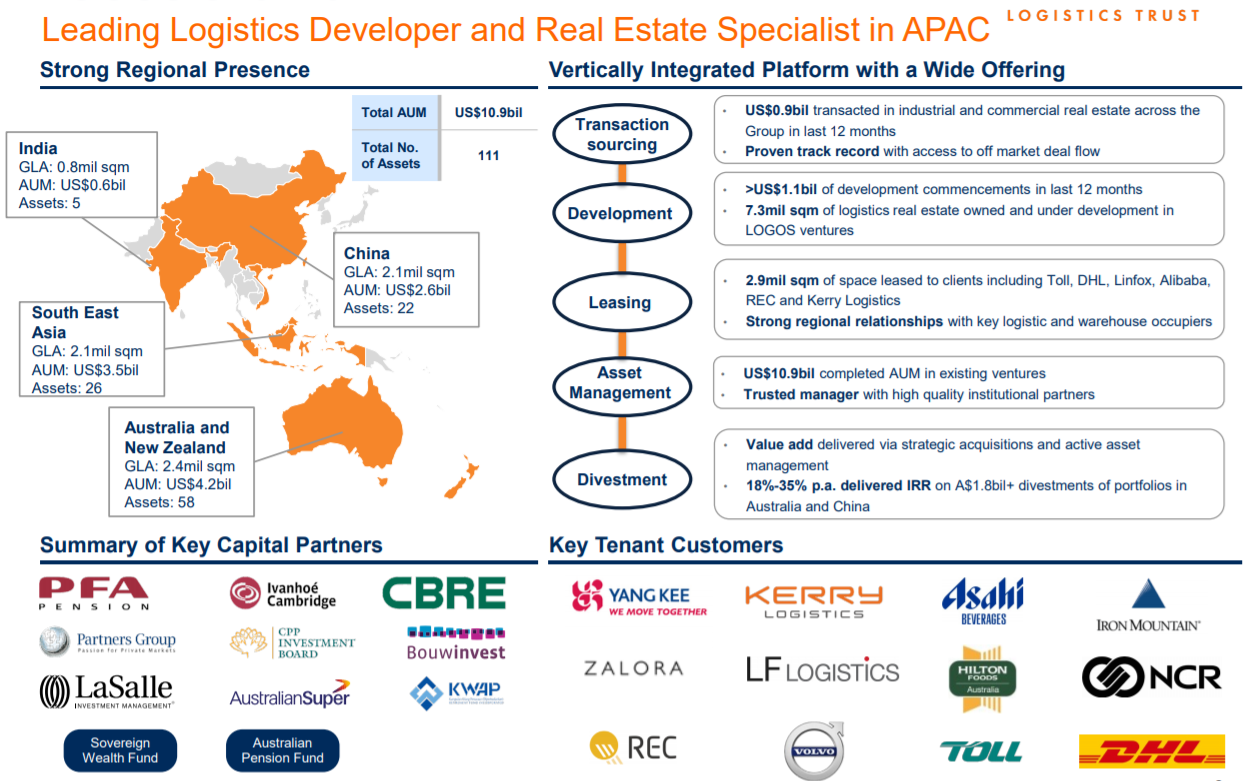

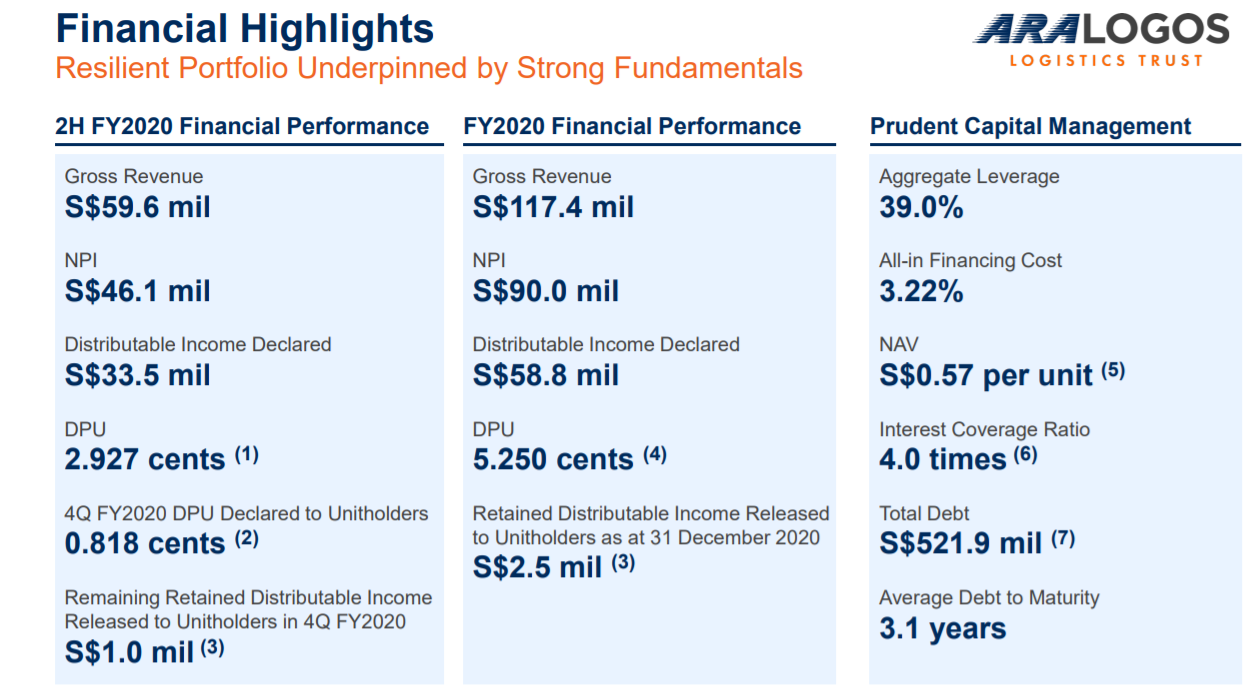

> [**DREAM INDUSTRIAL REIT (CANADA)**](): The Trust has approximately 186 assets and 280 industrial buildings comprising approximately 28.9 million square feet of gross leasable area across North America and European industrial markets. Its properties include in Western Canada, Canada, the United States, and Europe. The Trust portfolio consists of distribution buildings, urban logistics buildings, light industrial properties across Canada, the United States and Europe. Statistics: Occupancy Rate = 97.2%. Net Debt to Assets = 28%. Net Debt-to-EBITDA ~6X. As of May 4, collections for Q4-2020 were 99.4%. Nearly 95% of USD 2.3 million of rent deferred during Q2-2020 already repaid; no subsequent rent deferral arrangements

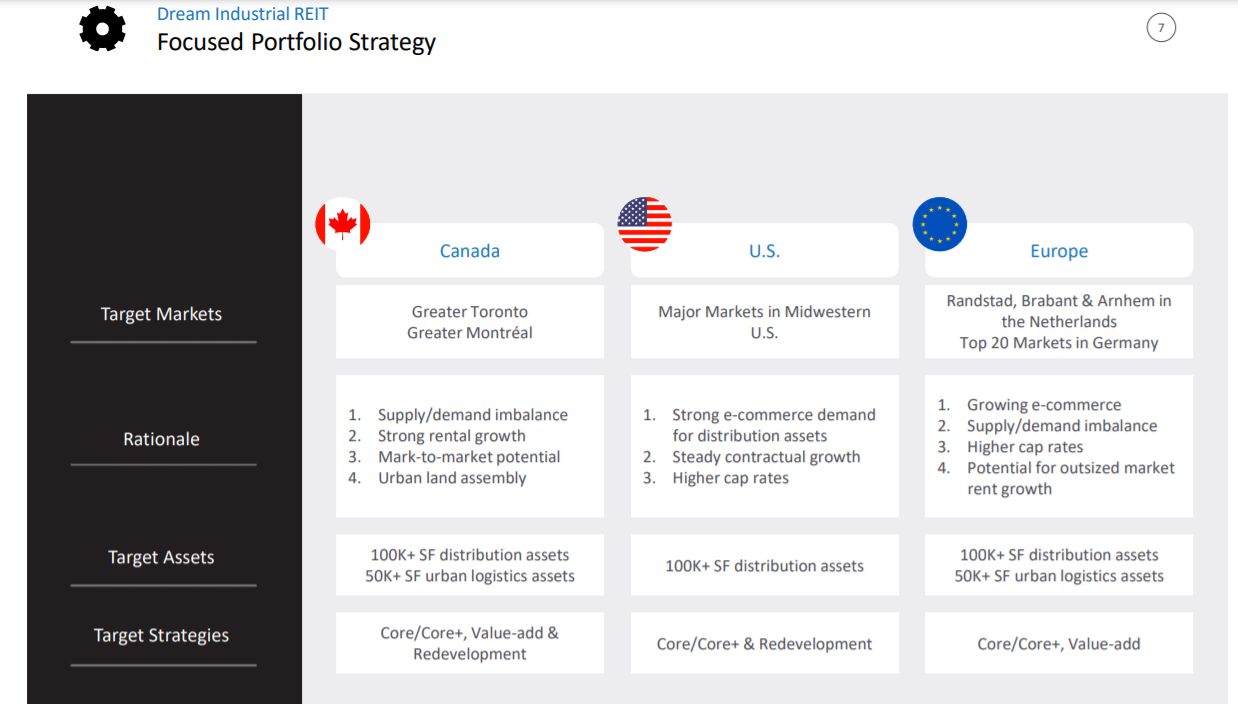

> [**(SUMMIT INDUSTRIAL - CANADA)**](https://s23.q4cdn.com/127117629/files/doc_financials/2021/q1/Summit-II-REIT-Q1-2021-Investor-Presentation.pdf): The Trust is involved in the commercial leasing of real estate property with approximately 160 property located in Ontario, Quebec, Alberta, British Columbia and New Brunswick. The Trust is focused on the light industrial sector of the Canadian real estate industry. The properties house such activities as warehousing and storage, light assembly and shipping, call centers and technical support, professional services and other similar uses. As of Q1 2021: Occupancy rate is 98.2%. All tenants now paying rent. Only 3 tenants defaulted during early stages of pandemic. ~100% of rent deferrals collected on schedule.  

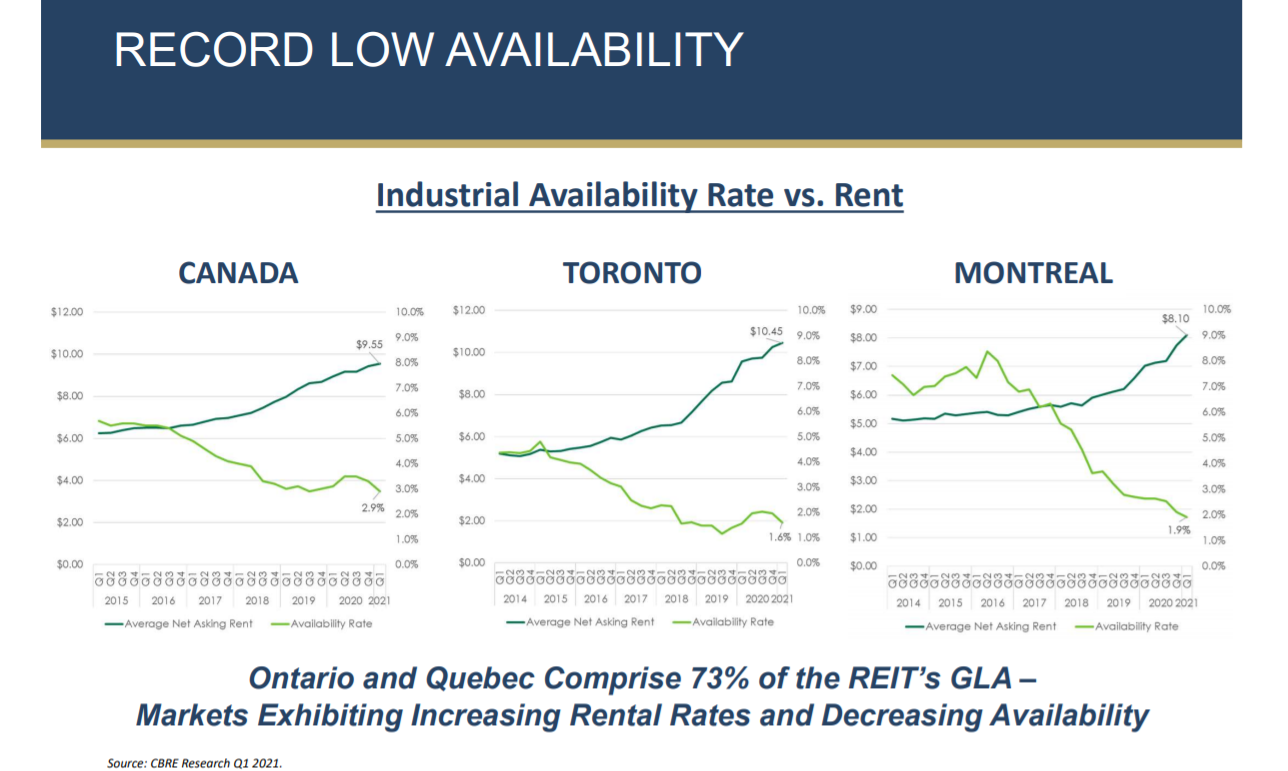

> [**(TRITAX BIG BOX REIT - UK)**](https://s24.q4cdn.com/499711848/files/doc-presentaion/2020/11/v2/WPT-Industrial-REIT-Q3-2020-Investor-Presentation-FINAL.pdf): Tritax Big Box REIT plc is a real estate investment trust (REIT) focused on investing in logistics facilities in the United Kingdom.  The Company focuses on well-located, modern Big Box logistics assets, typically greater than 500,000 square feet, let to institutional-grade tenants on long-term leases (typically at least 12 years in length) with upward-only rent reviews and geographic and tenant diversification throughout the United Kingdom. 99.8% of FY 2020 rents have been received with full collection expected by the Summer. 98% of Q1 2021 and 95% of Q2 2021 rents received, 99% expected to be received in respect of Q1 and Q2 by the end of June 2021. Take-up in Q1 2021 was lower than average reflecting the acute shortage of ready-to-occupy sites with vacancy falling below 4%.

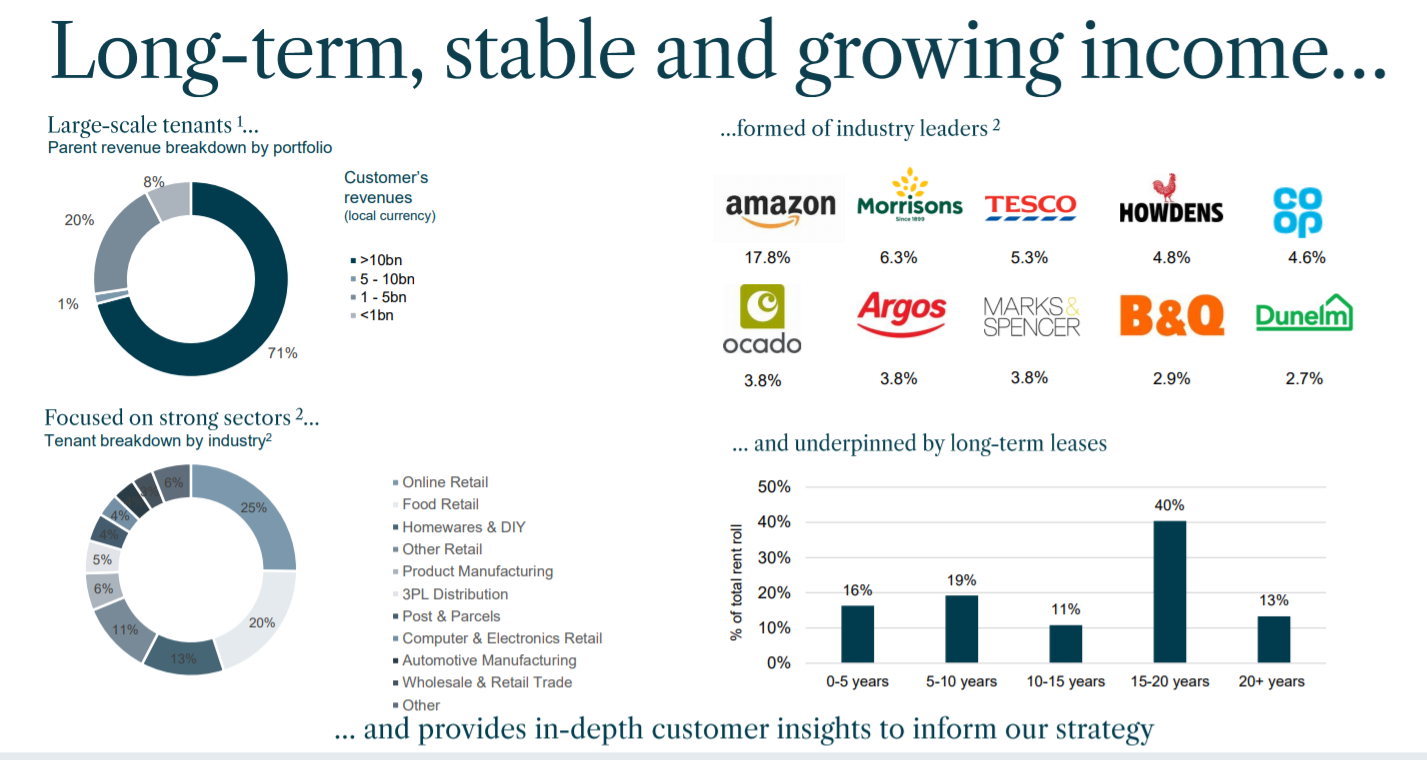

> [**(PROLOGIS - US)**](https://s22.q4cdn.com/908661330/files/doc_presentations/2021/06/June-NAREIT-2021-Conference-Final.pdf): Prologis, Inc. is a real estate investment trust headquartered in San Francisco, California that invests in logistics facilities, with a focus on the consumption side of the global supply chain. As of December 31, 2020, the company owned 4,703 buildings comprising 984 million square feet in 19 countries in North America, Latin America, Europe, and Asia. According to The Economist, its business strategy is focused on warehouses that are located close to huge urban areas where land is scarce. It serves over 5,000 tenants. The company has a market cap of USD 92 billion. A3/A- rated by Moody’s/S&P. The company has provided strong capital appreciation over the past decades. Although the dividend yield is low at 2%, the company is poised to benefit from the higher investments into supply chain & logistics in the post COVID world. 



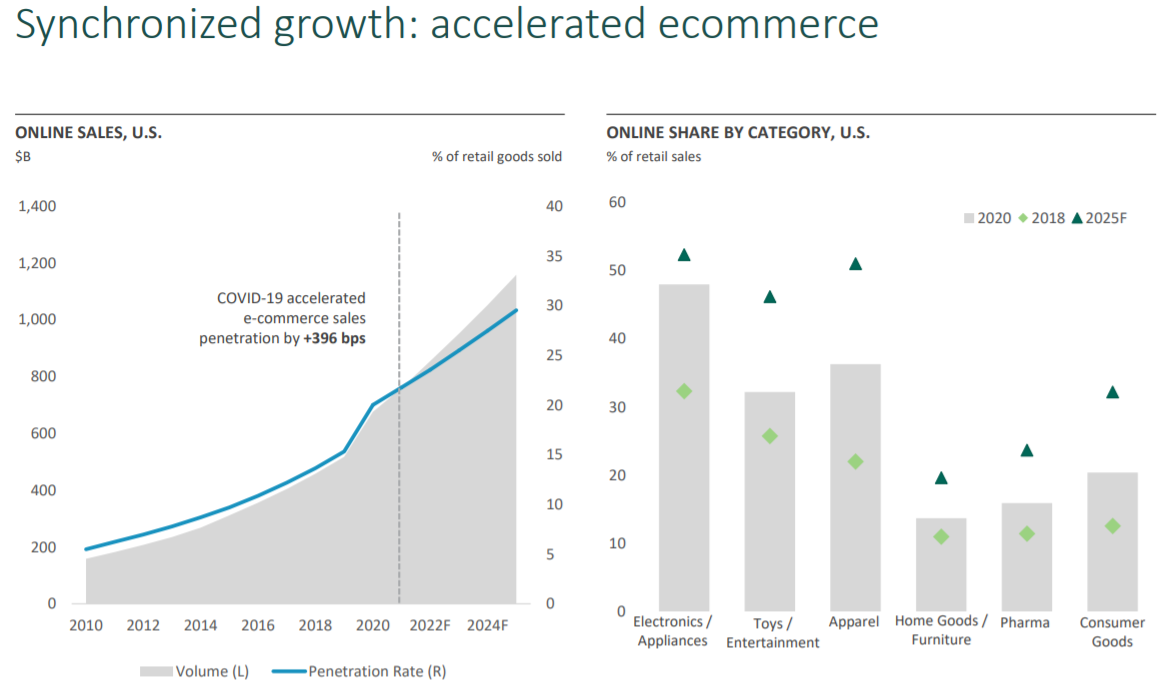

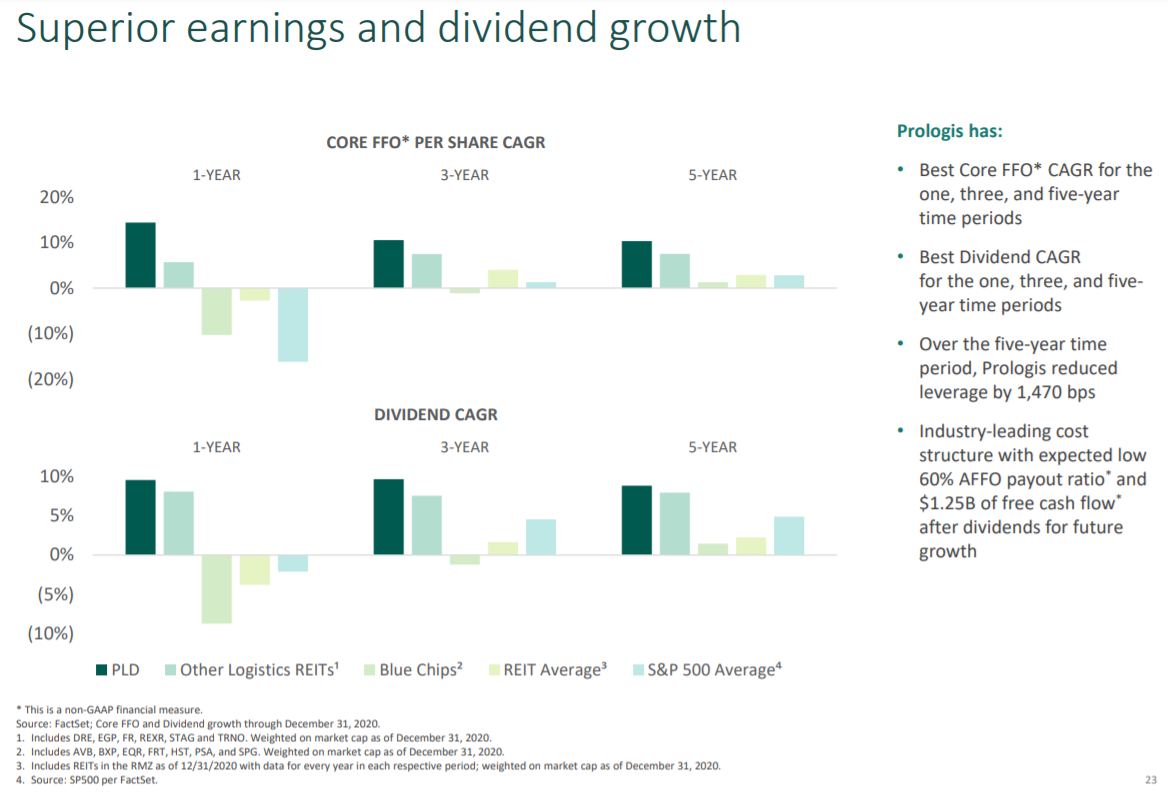

<a id ="specialty"></a>

[Return to Table of Contents](#content)

## High Yielding & High Momentum Specialized REITs

In [7]:
spl = data.set_index("Ticker").T[[
 'NSA US Equity',
 'LSI US Equity',
 'EXR US Equity',
 'CUBE US Equity',
 'IRM US Equity',
 'CQE AU Equity',
 'PSA US Equity',
 'RYN US Equity',
 'SAFE LN Equity',
 'BYG LN Equity',
 'COR US Equity',
 'SAFE US Equity',
 'CCI US Equity',
 'EQIX US Equity',
 'RFF AU Equity']].T.sort_values(by="COMPOSITE RANK", ascending=True)
spl.iloc[:,:12].drop(['COMPOSITE RANK'],axis=1).style.format(format_dict).background_gradient(cmap="RdYlGn").set_caption('Global Top Specialized REITs')

> As of June 30, total returns from self-storage real-estate investment trusts reached 36%, outpacing other REIT sectors except shopping center and mall landlords. Over the same period, the FTSE Nareit Equity REITs Index gained 22% and the S&P 500 climbed 15%.

>  A 10-foot-by-10-foot, climate-controlled elevator access unit in Dallas that cost USD 210 a month in June 2020 was late last month going for USD 409, according data from Radius+, a news and analysis provider for the self-storage industry. While net rents in the self-storage industry climbed 56% last month from a year earlier, they were around 15% above the peak last seen in 2016. - WSJ

> [**(NATIONAL STORAGE - US)**](https://d1io3yog0oux5.cloudfront.net/_9492796184ea1941991955573a43a092/nationalstorageaffiliates/db/226/4736/pdf/2021_06_08_REITweek+2021_FINAL.pdf): The Company is focused on the ownership, operation and acquisition of self-storage properties located within various metropolitan statistical areas (MSAs) across the United States. The Company held ownership interests in and operated a geographically diversified portfolio of 448 self storage properties, located in 23 states, comprising approximately 27.6 million rentable square feet, configured in approximately 220,000 storage units.
Interest Coverage Ratio of 4.9x. BBB rated.

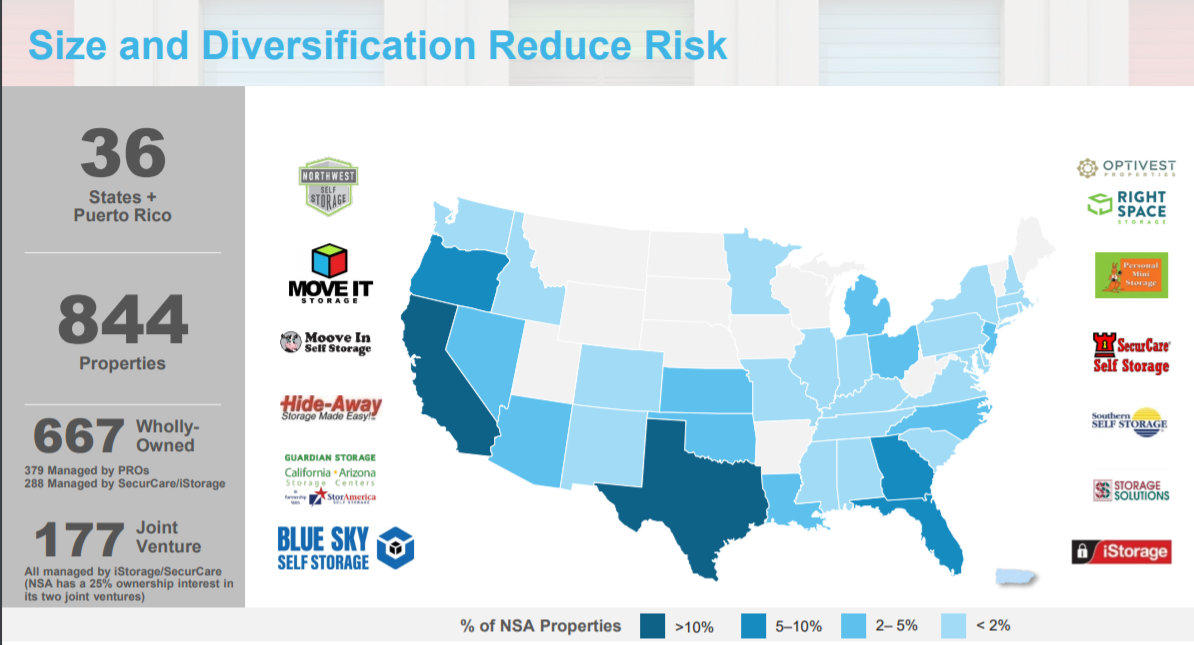

> [**(EXTRA SPACE STORAGE - US)**](): The Company owns, operates, manages, acquires, develops and redevelops self-storage properties located throughout the United States. The Company operates through three segments: rental operations; tenant reinsurance, and property management, acquisition and development. Using the most recent data (March 2021), we see that EXR has a 7.8% market share in a very fragmented market. The good news is that the company is achieving its expansion without having to use discounts to attract customers. Compared to prior years, the company is seeing a decline in discount trends. Company's average weighted interest rate is just 2.7%. The company has a 6.3x interest coverage ratio and a BBB rating from S&P Global. 

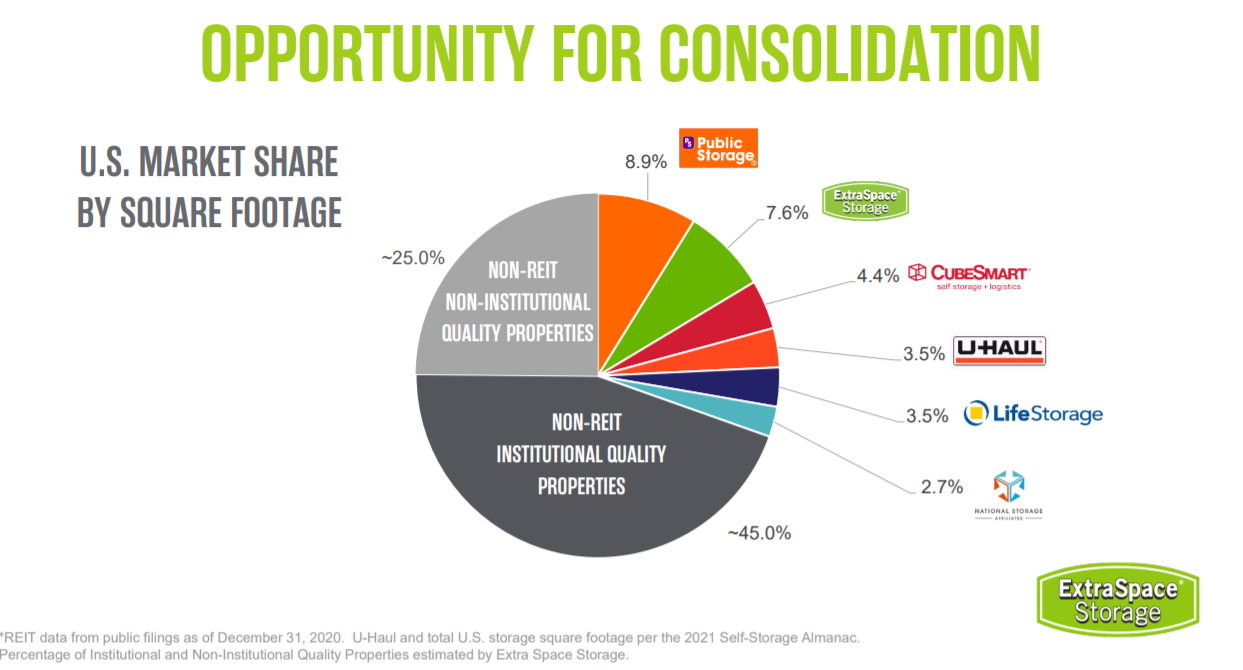

> [**(CROWN CASTLE INTERNATIONAL - US)**](): Crown Castle International Corp. is a real estate investment trust, which owns, operates and leases shared wireless infrastructure that is geographically dispersed throughout the United States and Puerto Rico. The Company's segments include towers and small cells. As of December 31, 2016, it had approximately 40,000 towers and other structures, such as rooftops (collectively towers) and approximately 26,500 route miles of fiber (collectively small cells, and together with towers, wireless infrastructure). The towers segment provides access, including space or capacity to its towers, which are geographically dispersed throughout the United States.


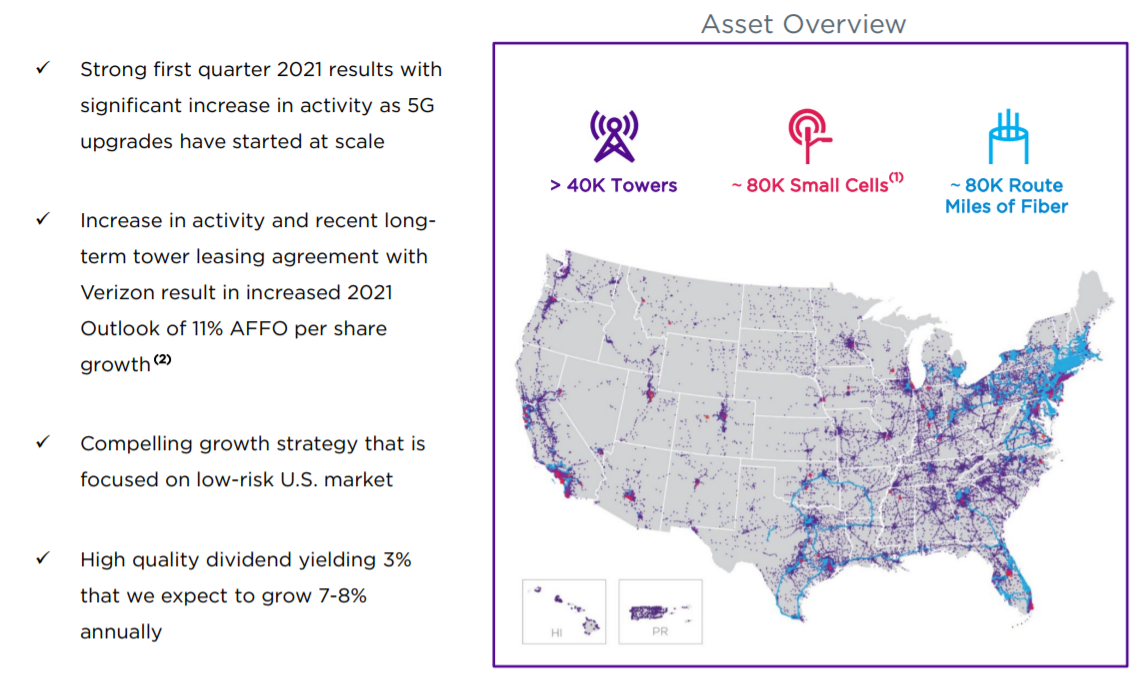

> [**(IRON MOUNTAIN- US)**](https://investors.ironmountain.com/overview/default.aspx): The Company stores records, primarily physical records and data backup media, and provides information management services in various locations throughout North America, Europe, Latin America, Asia Pacific and Africa. The Company provides storage and information management services to legal, financial, healthcare, insurance, life sciences, energy, businesses services, entertainment and government organizations.

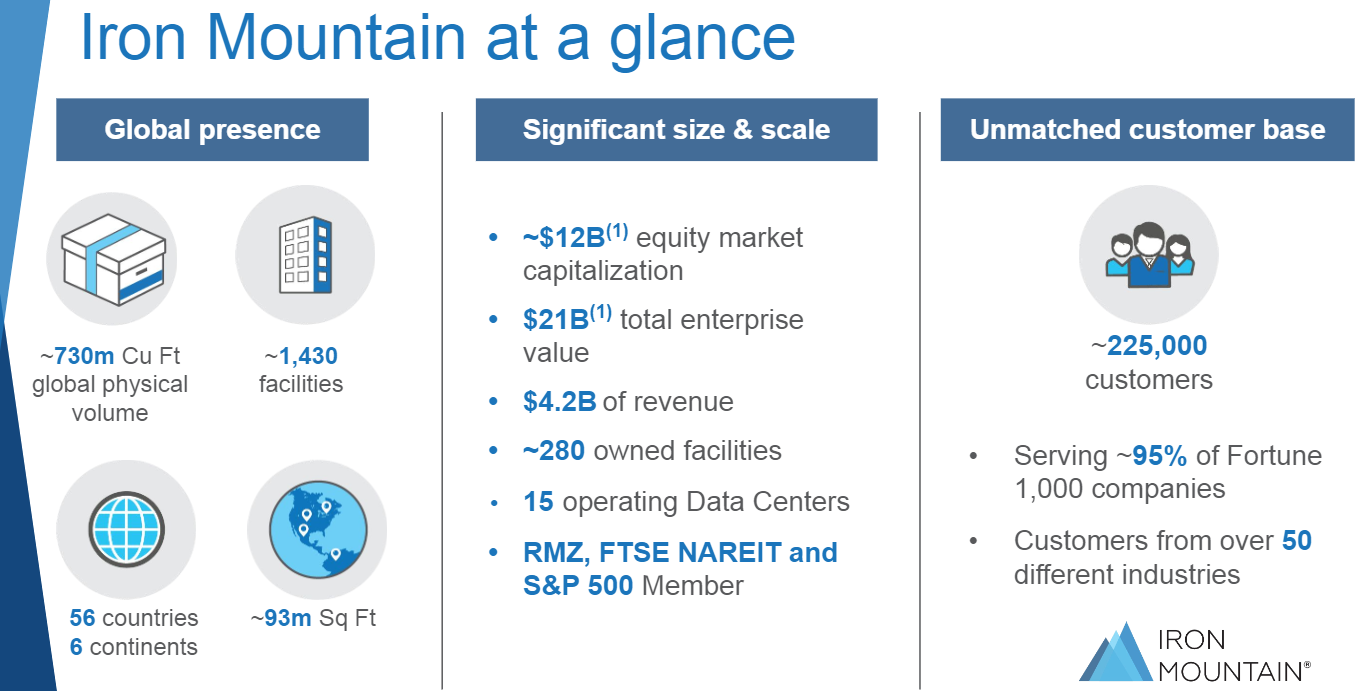

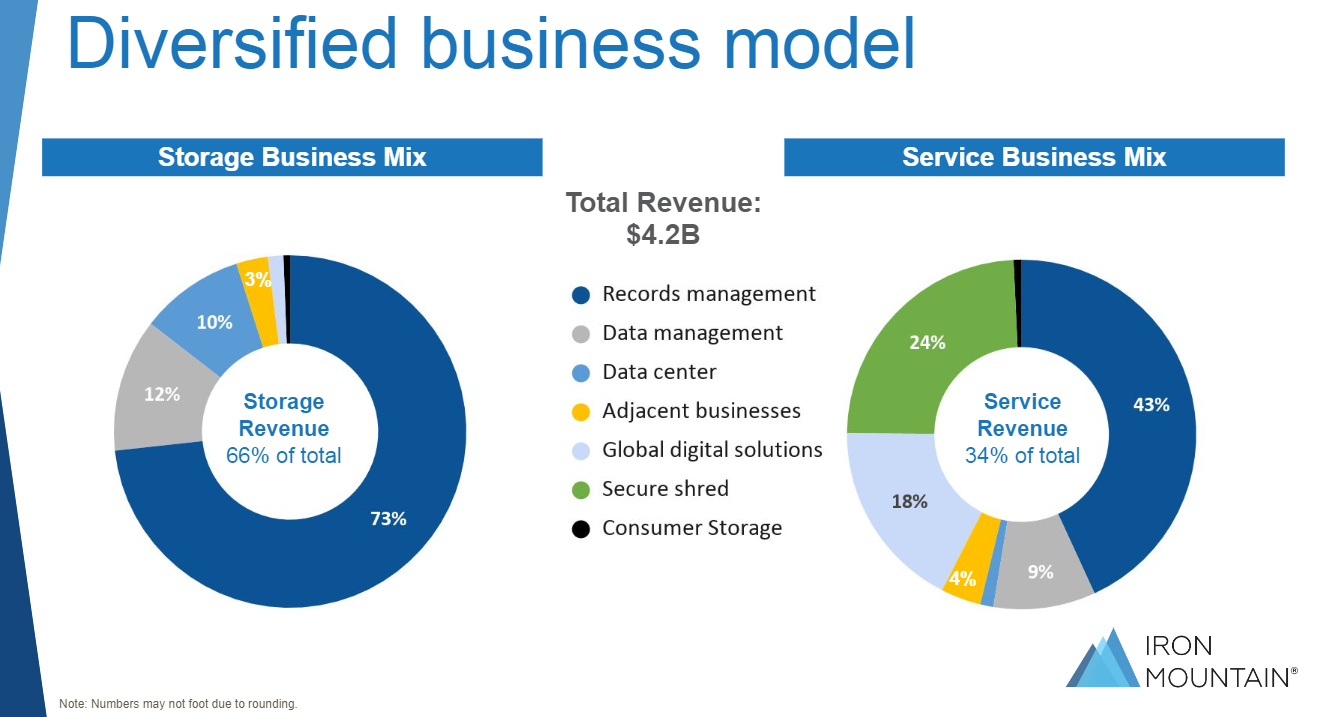

[Return to Table of Contents](#content)

In [20]:
#dfr = yf.download('VNQ SCHH IYR XLRE ICF USRT RWR FREL REM BBRE SRVR REZ SRET KBWY MORT INDS FRI PPTY VRAI PSR NETL NURE RDOG EWRE ROOF')['Adj Close']